# 1. 모듈 및 데이터 불러오기

### 데이터 출처 및 설명 
데이콘 제 12회 버스 운행시간 예측 데이터를 사용했습니다.
아직 머신러닝이 익숙하지 않아 우수 코드 참고하고 여러 방향으로 구글링하면서 공부한다는 생각으로 과제했습니다!
말씀해주신 대로 포트폴리오를 만든다는 생각으로 해보려고 했지만 정확도가 너무 떨어져서ㅠㅠ

In [1]:
from IPython.core.display import display, HTML # 셀이 화면 전체 채우도록 함
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
## 자주 쓰는 모듈들
import pandas as pd
import numpy as np

import sklearn
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [3]:
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
from joblib import Memory
from shutil import rmtree

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR

In [4]:
import os
os.chdir(r'C:\Users\lcm01\Desktop\tobigs\week5\머신러닝')

In [5]:
# 경고 무시
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 데이터 불러오기
train = pd.read_csv('train.csv') # train 시킬 데이터

# 과제에서는 train 데이터로 train, test 모두 진행했습니다!

# 2. 데이터 탐색

In [7]:
train.shape

(210457, 14)

In [8]:
def display_data(data, num):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): # temporarily unleash limit
        print('dataset shape is: {}'.format(data.shape))
        display(data.head(num))
        display(data.sample(num).sort_index())
        display(data.tail(num))

In [9]:
display_data(train, 5)

dataset shape is: (210457, 14)


,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64


,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
21489,21489,2019-10-16,405136522,7997095,365-22,33.458783,126.557353,제대아파트,19시,415.0,제주대학교,33.459893,126.561624,36
55387,55387,2019-10-18,405320114,7983031,201-14,33.539982,126.673231,함덕리 4구,19시,457.0,911의원,33.540685,126.678082,40
130862,130862,2019-10-23,405320114,7983038,201-14,33.369332,126.869035,삼달교차로,08시,915.0,희진주유소,33.376610,126.873644,60
174507,174507,2019-10-26,405320112,7983066,201-12,33.263504,126.626094,하례1리입구,14시,787.0,망장포 입구,33.264083,126.634500,156
209789,209789,2019-10-28,405328102,7983439,281-2,33.500228,126.525625,탐라장애인 종합복지관,13시,165.0,홍랑로입구,33.499974,126.523865,16


,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38
210456,210456,2019-10-28,405328102,7983486,281-2,33.248487,126.511195,대륜동주민센터,21시,189.0,서귀포버스터미널(가상정류소),33.249091,126.509224,24


In [10]:
# 결측치 확인
print(train.isnull().sum())

id                  0
date                0
route_id            0
vh_id               0
route_nm            0
now_latitude        0
now_longitude       0
now_station         0
now_arrive_time     0
distance            0
next_station        0
next_latitude       0
next_longitude      0
next_arrive_time    0
dtype: int64


처리할 결측치가 없는 것처럼 보이지만 구글링을 통해 찾은 결과로
몇 가지 처리를 해줍시다

1. now arrive time 열이 '00시'인 경우 제거
2. train의 'next station'이 '전경대 입구'인 경우 제거 (test에 없는 정거장)
3. test 데이터에서 'now_station'이 '제주한라대학교'인 경우 '노형오거리'로! (train에 없는 정거장)

In [11]:
# 문제 1.
train.drop(train[train['now_arrive_time'] == "00시"].index, inplace=True)

In [12]:
# 문제 2.
train.drop(train[train['next_station'] == "전경대 입구"].index, inplace=True)

#### 필요없는 열을 제거해줍시다

In [13]:
# 제거할 열
# 1. route_id
# 2. now_station : 정류소의 이름은 영향을 주지 않으므로 삭제!
# 3. next_station : 3번과 마찬가지의 이유로 삭제!
# 4. vh_id : 각각 버스의 id는 영향을 주지 않으므로 삭제!
# -> 결론적으로, 영향을 주지 않을 것 같은 데이터는 모두 삭제!
train.drop(['id', 'route_nm', 'now_station', 
           'next_station', 'vh_id',
           'now_latitude', 'now_longitude',
           'next_latitude','next_longitude',
           'route_id'], 
           axis=1 , inplace=True)

In [14]:
train.head() # 확인

,date,now_arrive_time,distance,next_arrive_time
0,2019-10-15,06시,266.0,24
1,2019-10-15,06시,333.0,36
2,2019-10-15,06시,415.0,40
3,2019-10-15,06시,578.0,42
4,2019-10-15,07시,374.0,64


train data의 next_arrive_time 의 분포를 살펴볼게요

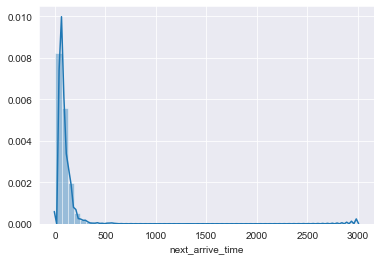

In [15]:
sns.distplot(train['next_arrive_time'])

원 데이터가 
1. 대부분이 500 이하의 값을 가짐
2. 분포가 치우쳐 있음
을 알 수 있음.

로그를 취해서 정규분포와 비슷하게 바꿔줍시다 (2번 문제 해결을 위해!)

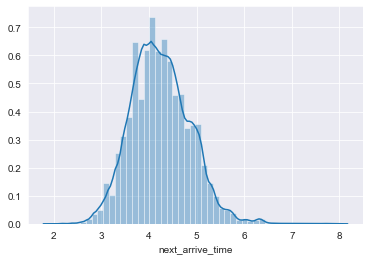

In [16]:
sns.distplot(np.log1p(train['next_arrive_time']))

#### 1. 날짜 feature

In [17]:
train['date'] = pd.to_datetime(train['date'])

In [18]:
train['date'].head(15) #확인

0    2019-10-15
1    2019-10-15
2    2019-10-15
3    2019-10-15
4    2019-10-15
5    2019-10-15
6    2019-10-15
7    2019-10-15
8    2019-10-15
9    2019-10-15
10   2019-10-15
11   2019-10-15
12   2019-10-15
13   2019-10-15
14   2019-10-15
Name: date, dtype: datetime64[ns]

#### 2. 요일 feature

In [19]:
train['weekday'] = train['date'].dt.weekday

In [20]:
train['weekday'].value_counts() # 값 확인

1    31311
3    30963
2    30815
0    30352
4    30003
5    28805
6    28196
Name: weekday, dtype: int64

In [21]:
train = pd.get_dummies(train, columns=['weekday']) # 더미변수 생성

#### 3. 시간대 feature

In [22]:
#히스토그램에서 한글 깨짐 현상 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

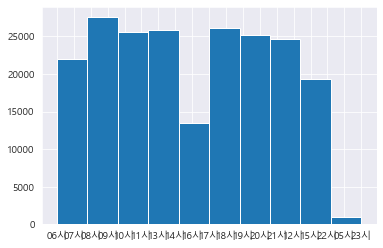

In [23]:
train['now_arrive_time'].hist()

12~6시 사이의 값은 거의 없어 보이네요. value_counts로 살펴봅시다

In [24]:
train['now_arrive_time'].value_counts()

08시    13837
09시    13700
07시    13578
16시    13476
12시    13433
19시    13275
13시    13197
17시    13089
10시    13011
18시    12986
15시    12846
14시    12592
11시    12524
20시    11851
21시    11230
06시     8409
22시     6470
05시      487
23시      454
Name: now_arrive_time, dtype: int64

0시에서 5시 사이의 값은 없는 걸 확인할 수 있음!

시간대 피처를 생성해줍니다 (구글에서 참고하였습니다!)

In [25]:
train['time_group']='group' #time_group 변수를 미리 생성

In [26]:
train.loc[ (train['now_arrive_time']>='05시') & (train['now_arrive_time'] <'09시') ,['time_group'] ]= 'morning1' # 05~11시
train.loc[ (train['now_arrive_time']>='09시') & (train['now_arrive_time'] <'12시') ,['time_group'] ]= 'morning2' # 05~11시
train.loc[ (train['now_arrive_time']>='12시') & (train['now_arrive_time'] <'15시') ,['time_group'] ]= 'afternoon1' #12~17시
train.loc[ (train['now_arrive_time']>='15시') & (train['now_arrive_time'] <'18시') ,['time_group'] ]= 'afternoon2' #12~17시
train.loc[ (train['now_arrive_time']>='18시') & (train['now_arrive_time'] <'21시'),['time_group'] ]= 'evening1' #18~00시
train.loc[ (train['now_arrive_time']>='21시') | (train['now_arrive_time']=='00시'),['time_group'] ]= 'evening2' #18~00시

In [27]:
train = pd.get_dummies(train,columns=['time_group']) # 원 핫 인코딩을 수행
train = train.drop('now_arrive_time', axis=1) # 필요없는 now_arrive_time drop
display_data(train, 5) # 확인!

dataset shape is: (210445, 16)


,date,distance,next_arrive_time,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon1,time_group_afternoon2,time_group_evening1,time_group_evening2,time_group_morning1,time_group_morning2
0,2019-10-15,266.0,24,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2019-10-15,333.0,36,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2019-10-15,415.0,40,0,1,0,0,0,0,0,0,0,0,0,1,0
3,2019-10-15,578.0,42,0,1,0,0,0,0,0,0,0,0,0,1,0
4,2019-10-15,374.0,64,0,1,0,0,0,0,0,0,0,0,0,1,0


,date,distance,next_arrive_time,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon1,time_group_afternoon2,time_group_evening1,time_group_evening2,time_group_morning1,time_group_morning2
35364,2019-10-17,267.0,70,0,0,0,1,0,0,0,0,0,0,0,1,0
50988,2019-10-18,562.0,152,0,0,0,0,1,0,0,0,0,1,0,0,0
163479,2019-10-25,245.0,50,0,0,0,0,1,0,0,0,0,0,0,1,0
201870,2019-10-28,422.0,40,1,0,0,0,0,0,0,1,0,0,0,0,0
209034,2019-10-28,7185.0,536,1,0,0,0,0,0,0,0,1,0,0,0,0


,date,distance,next_arrive_time,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon1,time_group_afternoon2,time_group_evening1,time_group_evening2,time_group_morning1,time_group_morning2
210452,2019-10-28,528.0,96,1,0,0,0,0,0,0,0,0,0,1,0,0
210453,2019-10-28,280.0,50,1,0,0,0,0,0,0,0,0,0,1,0,0
210454,2019-10-28,114.0,16,1,0,0,0,0,0,0,0,0,0,1,0,0
210455,2019-10-28,223.0,38,1,0,0,0,0,0,0,0,0,0,1,0,0
210456,2019-10-28,189.0,24,1,0,0,0,0,0,0,0,0,0,1,0,0


# 3. 모델 구축 & 학습

### 1. 학습데이터 구성

In [38]:
Xpre = list(train.columns) 
Xpre.remove('next_arrive_time')
Xpre.remove('date')
Xpre

['distance',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'time_group_afternoon1',
 'time_group_afternoon2',
 'time_group_evening1',
 'time_group_evening2',
 'time_group_morning1',
 'time_group_morning2']

In [39]:
X = train[Xpre]

In [40]:
X

,distance,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon1,time_group_afternoon2,time_group_evening1,time_group_evening2,time_group_morning1,time_group_morning2
0,266.0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,333.0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,415.0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,578.0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,374.0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,528.0,1,0,0,0,0,0,0,0,0,0,1,0,0
210453,280.0,1,0,0,0,0,0,0,0,0,0,1,0,0
210454,114.0,1,0,0,0,0,0,0,0,0,0,1,0,0
210455,223.0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
y = train['next_arrive_time']

In [49]:
y = y/60 # 분 단위로 바꾸자

### 2. 모델 학습

In [50]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [51]:
#데이터 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
X_train

,distance,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon1,time_group_afternoon2,time_group_evening1,time_group_evening2,time_group_morning1,time_group_morning2
159695,636.0,0,0,0,0,1,0,0,1,0,0,0,0,0
125809,633.0,0,0,1,0,0,0,0,0,0,0,0,0,1
124859,435.0,0,0,1,0,0,0,0,0,1,0,0,0,0
14673,418.0,0,1,0,0,0,0,0,0,0,0,0,0,1
120382,214.0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191375,142.0,0,0,0,0,0,0,1,0,0,0,0,0,1
81350,525.0,0,0,0,0,0,0,1,0,0,0,1,0,0
139647,232.0,0,0,0,1,0,0,0,1,0,0,0,0,0
175855,627.0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [53]:
# 그리드 서치 사용

from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('RMSE:', np.round(rmse, 4))
    print('최적 parameter:', grid_model.best_params_)
    
    return grid_model.best_estimator_

In [54]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[3300]}

lgbm_reg = LGBMRegressor(n_estimators=3300, bagging_fraction=0.7, learning_rate=0.1,
                         max_depth=4, subsample=0.7, feature_fraction=0.9, boosting_type='gbdt',
                         colsample_bytree=0.5, reg_lambda=5, n_jobs=-1)

best_lgbm = get_best_params(lgbm_reg, lgbm_params)

최적 평균 RMSE 값: 1.1342
최적 파라미터: {'n_estimators': 3300}


### LightGBM

In [56]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor()

In [57]:
# LightGBM
model_lgb.fit(X_train, y_train)
lgb_train_pred = model_lgb.predict(X_train)
lgb_pred = model_lgb.predict(X_train)

In [63]:
model_lgb.score(X_test, y_test)

0.36489551088485717

### XGBoost

In [59]:
model_xgb = xgb.XGBRegressor()

In [60]:
# XGBoost
model_xgb.fit(X_train, y_train)
xgb_train_pred = model_xgb.predict(X_train)
xgb_pred = model_xgb.predict(X_train)

[19:21:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [61]:
model_xgb.score(X_test, y_test)

0.314275532847331

요일, 날짜 등의 피처를 생성해서 여러 방법으로 모델을 만들어 봤는데 스코어가 너무 낮네요ㅠㅠ..
좀 더 공부해서 다음 모델을 만들 때는 더 정확도가 높은 모델을 만들도록 노력해보겠습니다!
진심으로 여러 면에서 유익한 수업이었고 감사드립니다! :)